# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
# we import all the libraries we need 

from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [6]:
#probability that the fruit is apple from a basket of apples and oranges

p_apple=0.6
print(f'The probability that the fruit is apple is: {p_apple}')

#probability that the fruit is orange from a basket of apples and oranges

p_orange=1 -p_apples
print(f'The probability that the fruit is orange is: {p_orange}')

The probability that the fruit is apple is: 0.6
The probability that the fruit is orange is: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

1. **What is the probability that the first 5 fruits are all apples?**


In [29]:
# we create a distribution for apples
my_bernoulli = bernoulli(p_apple)


In [9]:
# we use .rvs, which will allow us to generate pseudorandom numbers that follow the distribution we have created

sample_20 = my_bernoulli.rvs(size=20)
sample_20

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [31]:
print(f"Probability of picking 5 apples followed by 15 oranges is : {p_apple ** 5}")


Probability of picking 5 apples followed by 15 oranges is : 0.07775999999999998


2. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**


In [35]:
# probability of picking 5 apples followed by 15 oranges
print(f"The probability of picking 5 apples and the next 15 fruits oranges is: {p_apple ** 5 * p_orange**15}")



The probability of picking 5 apples and the next 15 fruits oranges is: 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [36]:
# we use the previous sample we create
sample_20

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [37]:
N=20
# start the method to create a binomial
my_binomial = binom(N, p_apple)

In [38]:
apple_num=np.arange(1,6)

In [40]:
oranges_num= np.arange(1,16)

In [43]:
prob = my_binomial.pmf(apple_num)
prob

array([3.29853488e-07, 4.70041221e-06, 4.23037099e-05, 2.69686150e-04,
       1.29449352e-03])

In [42]:
prob2=my_binomial.pmf(oranges_num)
prob2

array([3.29853488e-07, 4.70041221e-06, 4.23037099e-05, 2.69686150e-04,
       1.29449352e-03, 4.85435071e-03, 1.45630521e-02, 3.54974396e-02,
       7.09948791e-02, 1.17141551e-01, 1.59738478e-01, 1.79705788e-01,
       1.65882266e-01, 1.24411699e-01, 7.46470195e-02])

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [44]:
# your code here
accumulate_prob = my_binomial.cdf(5)
accumulate_prob

0.001611524643456288

In [56]:
apples_n= np.arange(1,21)
probs = my_binomial.pmf(apples_n)

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

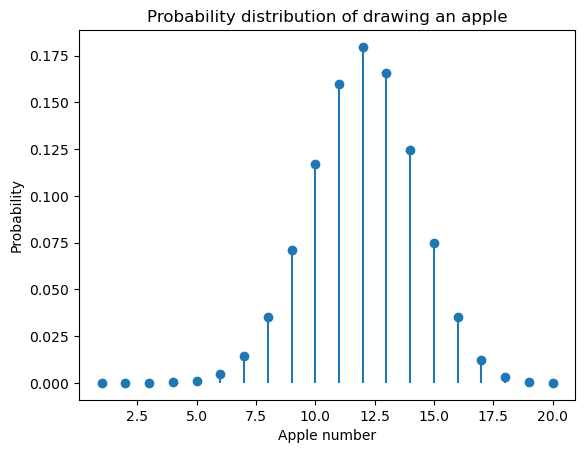

In [57]:
# your code here
# Please label the axes and give a title to the plot 

plt.plot(apples_n, my_binomial.pmf(apples_n), 'o')
plt.vlines(apples_n, 0, probs)
plt.title("Probability distribution of drawing an apple")
plt.xlabel("Apple number")
plt.ylabel("Probability");

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [60]:
# your code here 
import math 
p_goals= 2.3


In [61]:
# start the Poisson distribution
my_poisson = poisson(mu = p_goals) 

In [62]:
goal = 5 
prob_goal = (math.exp(-p_goals) * (p_goals**goal)) / math.factorial(goal)
print(f'The probability that the number of goals scored in a match was 5 is : {prob_goal}')

The probability that the number of goals scored in a match was 5 is : 0.0537750255819468


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

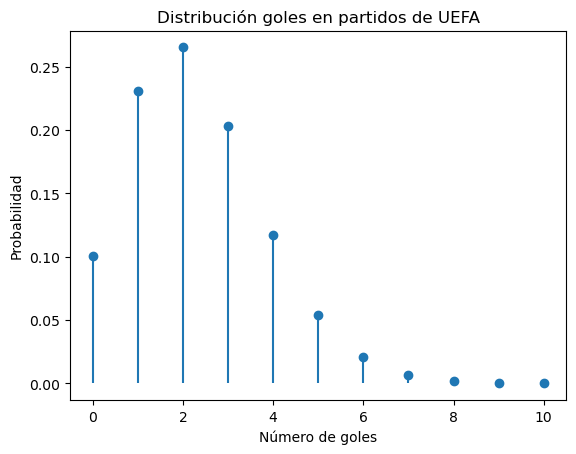

In [65]:
# your code here

goals = np.arange(0,11)
done_goals = my_poisson.pmf(goals)

# Please label the axes and give a title to the plot 

plt.plot(goals, my_poisson.pmf(goals), 'o')
plt.vlines(goals, 0, done_goals)
plt.title("Distribución goles en partidos de UEFA")
plt.xlabel("Número de goles")
plt.ylabel("Probabilidad");